# Visualización de datos con `plotnine`

Los análisis/transformación de los datos usando el paquete `pandas` puede ser directamente graficados usando el paquete `plotnine`. El paquete `plotnine` implementa en Python muchas de las funciones y sintaxis que tiene el paquete [`ggplot2`](https://ggplot2.tidyverse.org) en R. 


## Importación de paquetes y lectura de datos

In [1]:
import pandas as pd
import plotnine as p9
%matplotlib inline

In [2]:
surveys_df = pd.read_csv('surveys.csv')
len(surveys_df)

35549

In [3]:
surveys_complete = surveys_df.dropna() # eliminación de aquellas filas que contienen valores `NA`
len(surveys_complete)

30676

## Acoplación de datos


La formación del "canvas" o espacio donde los datos serán graficados son introducidos en la función `p9.ggplot()` usando el argumento `data`. Por ejemplo, para crear el canvas inicial donde el conjunto de datos previamente guardados en la variable `surveys_complete`, usamos la siguiente linea:

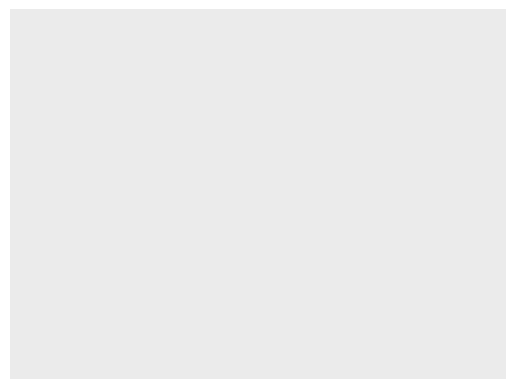

<ggplot: (-9223372036572485849)>

In [4]:
(p9.ggplot(data=surveys_complete))

El mapa de coordenadas por el eje `x` y `y` se forman inmediatamente depués de especificar las columnas que se desean graficar. Las columnas objetivos son también especificadas dentro de la función `p9.ggplot()` usando el argumento `mapping` y la función `p9.aes()`. De nuestro ejemplo, graficaremos en el eje `x` los valores de peso (i.e. `weight`) y en el eje `y` los valores de longitud (i.e. `hindfoot_length`):


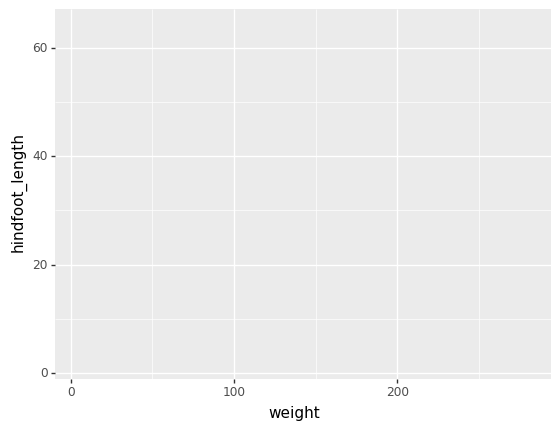

<ggplot: (7553932271)>

In [5]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length')))

## Nube de puntos y estética

Ahora debemos especificar el tipo de geometría para las posiciones en el plano. Existen diferentes tipos de geometrías en el paquete plotnine, en este caso usaremos puntos adicionando la capa/función `p9.geom_point()`:

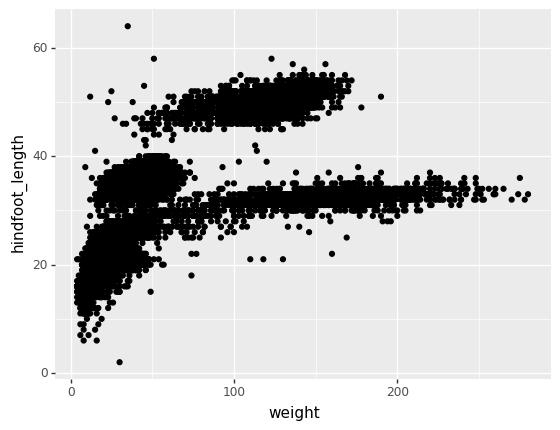

<ggplot: (7553989878)>

In [6]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length'))
   + p9.geom_point())

Notemos que para agregar una capa usamos el operador `+` y luego el nombre de la función. Los puntos del gráfico anterior pueden ser coloreados usando el argumento `color` y nombre de color deseado (e.g. `tomato`) dentro de la funcion `p9.geom_point()`:

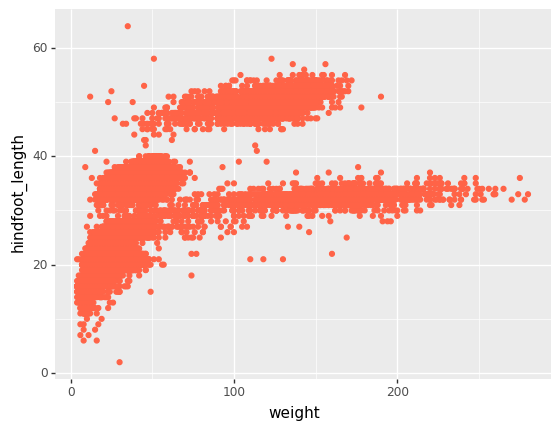

<ggplot: (-9223372036572606716)>

In [7]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length'))
   + p9.geom_point(color='tomato'))

La coloración de los puntos pueden también estar en función a los valores de una columna. Por ejemplo, si queremos agrupar por especie los puntos de la relación anterior, podemos usar el argumento `color` y el nombre de la columna de especies (i.e. `species_id`) dentro de la función `p9.aes()`:

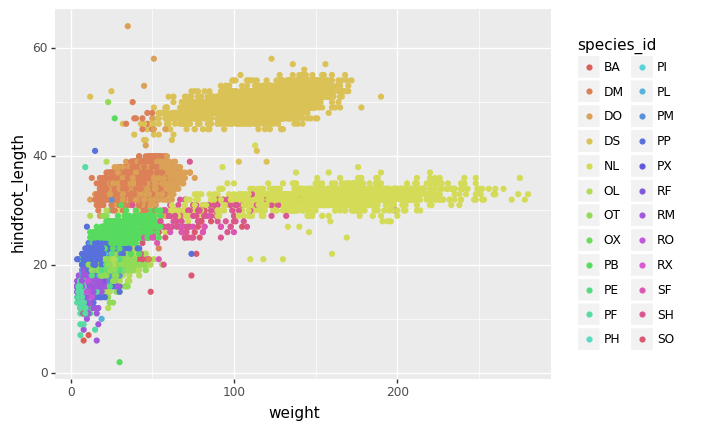

<ggplot: (282169215)>

In [8]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
   + p9.geom_point())

Un detalle estético que se le puede agregar a cada punto es la transparencia y esto es obtenido usando el argumento `alpha` dentro de la función `p9.geom_point()`. El rango de valores que acepta el argumento `alpha` va de 0 a 1. Mientras más bajo el valor de `alpha`, mas transparente se hacen los puntos:

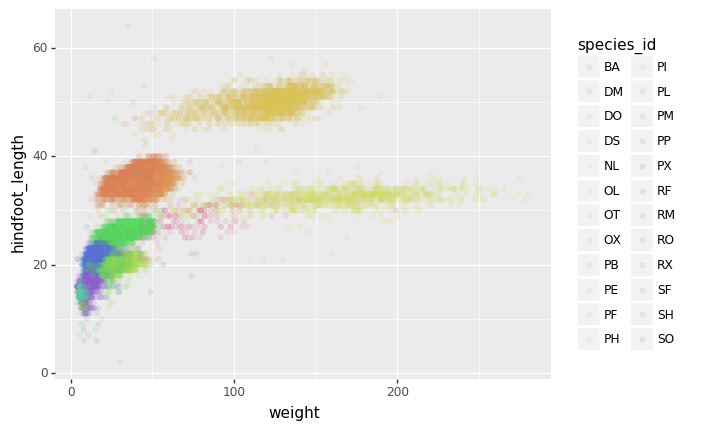

<ggplot: (-9223372029300560843)>

In [9]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
     + p9.geom_point(alpha=0.1) )

Por defecto, las etiquetas de las ordenadas y coordenadas son los nombres de las columnas que se usaron para graficar los puntos. Sin embargo, si queremos cambiar estas etiquetas para, por ejemplo, adicionar informacion como la unidad de medida, podemos usar las funciones `p9.xlab()` y `p9.ylab()` para los ejes `x` y `y`, repectivamente. En el siguiente ejemplo, cambiaremos las etiquetas `weight` y `hindfoot_length` por `Weight(g)` y `Hindfoot Length(m)`, respectivamente:

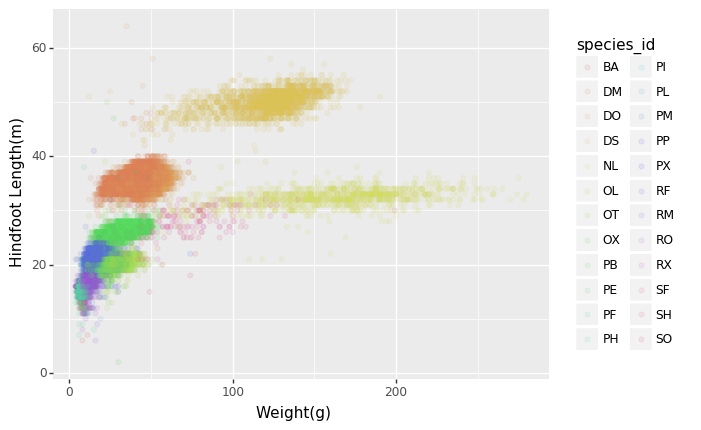

<ggplot: (7552408801)>

In [10]:
(p9.ggplot(data   = surveys_complete,
           mapping= p9.aes(x='weight',
                           y='hindfoot_length',
                           color='species_id'))
   + p9.geom_point(alpha=0.1)
   + p9.xlab("Weight(g)")
   + p9.ylab("Hindfoot Length(m)") )

Notemos cómo se van agregando más y más capas, usando el operador `+`, mientras se va refinando la estética del gráfico. Tener varias lineas de código de la forma:

```python
p9.ggplot(data, mapping) 
     + capa
     + capa 
     + ...
```
Es común a medida que se va personalizando los gráficos.


## Boxplot

Para obtener un diagramas de cajas debemos básicamente reemplazar la geometría `p9.geom_point()` por `p9.geom_boxplot()`. De esta manera, podemos obtener la distribución del peso (i.e. columna `weight`) por especie (i.e. columna `species_id`).

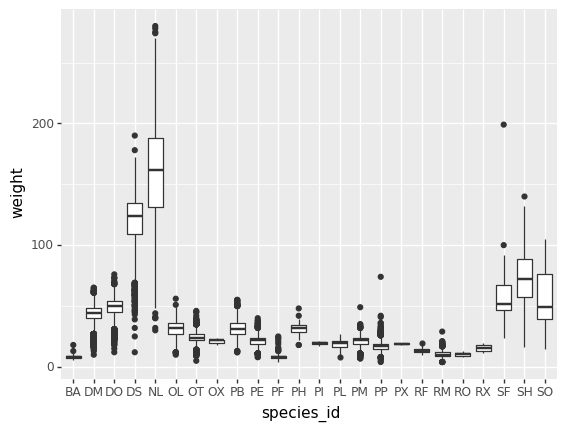

<ggplot: (-9223372029302253992)>

In [11]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
     + p9.geom_boxplot() )

Hay diferentes tipos de geometrías y funciones que ayudan a mejorar la forma en que se visualiza los datos usando `plotnine`. Más información sobre tutoriales, se puede encontrar [aquí](https://plotnine.readthedocs.io/en/stable/tutorials.html).